In [5]:
import numpy as np
import pandas as pd
import theano
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pickle

colors = get_cmap('Set1').colors

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
frame = pd.DataFrame(columns=['iteration', 'valid_MNL', 'valid_MLP2', 'valid_MLP4', 'valid_MLP8', 'valid_MLP16'])

filename = 'MNL0_bestmodel.pkl'

with open(filename, 'rb') as f:
    data = pickle.load(f)
    
model, config, model_stat = data

df = model_stat['training_frame']
frame['valid_MNL'] = df['valid_ll']
frame['train_MNL'] = df['train_ll']

filenames = ['MLP2', 'MLP4', 'MLP8', 'MLP16', 'ResNet2', 'ResNet4', 'ResNet8', 'ResNet16']

for filename in filenames:
    with open(filename+'_bestmodel.pkl', 'rb') as f:
        data = pickle.load(f)
        if len(data) == 3:
            model, config, model_stat = data
        df = model_stat['training_frame']
        frame['valid_'+filename] = df['valid_ll']
        frame['train_'+filename] = df['train_ll']

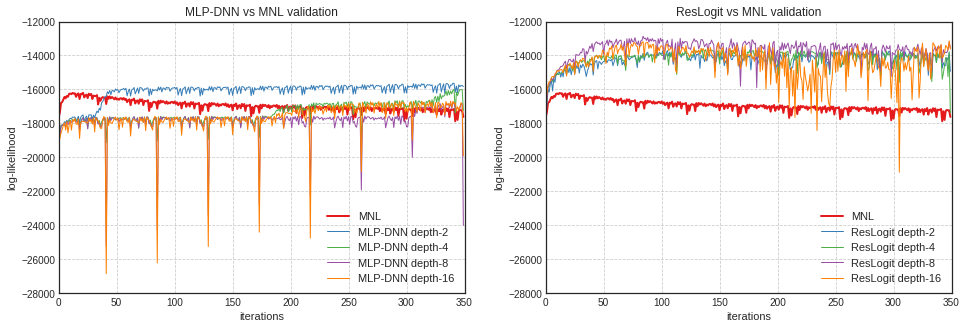

In [16]:
mpl.style.use('seaborn-white')

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 5))
frame = frame.iloc[(frame.index %6 == 0) & (frame.index > 10),:]
x = np.arange(len(frame))
axes[0].plot(x, -frame.loc[:,'valid_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
axes[0].plot(x, -frame.loc[:,'valid_MLP2'], ls='-', color=colors[1], label='MLP-DNN depth-2', lw=1)
axes[0].plot(x, -frame.loc[:,'valid_MLP4'], ls='-', color=colors[2], label='MLP-DNN depth-4', lw=1)
axes[0].plot(x, -frame.loc[:,'valid_MLP8'], ls='-', color=colors[3], label='MLP-DNN depth-8', lw=1)
axes[0].plot(x, -frame.loc[:,'valid_MLP16'], ls='-', color=colors[4], label='MLP-DNN depth-16', lw=1)
axes[1].plot(x, -frame.loc[:,'valid_MNL'], ls='-', color=colors[0], label='MNL', lw=2)
axes[1].plot(x, -frame.loc[:,'valid_ResNet2'], ls='-', color=colors[1], label='ResLogit depth-2', lw=1)
axes[1].plot(x, -frame.loc[:,'valid_ResNet4'], ls='-', color=colors[2], label='ResLogit depth-4', lw=1)
axes[1].plot(x, -frame.loc[:,'valid_ResNet8'], ls='-', color=colors[3], label='ResLogit depth-8', lw=1)
axes[1].plot(x, -frame.loc[:,'valid_ResNet16'], ls='-', color=colors[4], label='ResLogit depth-16', lw=1)

axes[0].set_xlabel('iterations', fontsize=11)
axes[0].set_ylabel('log-likelihood', fontsize=11)
axes[0].legend(ncol=1, loc='lower right', fontsize=11)
axes[0].grid(ls='--')
axes[0].set_ylim(-28000,-12000)
axes[0].set_xlim(0, 350)

axes[1].set_xlabel('iterations', fontsize=11)
axes[1].set_ylabel('log-likelihood', fontsize=11)
axes[1].legend(ncol=1, loc='lower right', fontsize=11)
axes[1].grid(ls='--')
axes[1].set_ylim(-28000,-12000)
axes[1].set_xlim(0, 350)

axes[0].set_title('MLP-DNN vs MNL validation')
axes[1].set_title('ResLogit vs MNL validation')

fig.savefig('images/validation_curves_highdpi.jpg', format='jpg', dpi=300)